In [1]:
import pickle
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from pathlib import Path
nw_dir = Path('../2_pipeline/12d_Preprocessing-Abbreviations_and_Biolink/out/').resolve()

from data_tools import combine_nodes_and_edges
from data_tools.wiki import get_curi_xrefs
import data_tools.df_processing as dt
from data_tools.plotting import count_plot_h

from biothings_client import get_client
mg = get_client('gene')

/opt/mmayers/software/anaconda3/envs/ml/lib/python3.6/site-packages/data_tools/df_processing.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
node_color_map = {'AnatomicalEntity': "#8c88d7",
                'BiologicalProcessOrActivity': "#b75970",
                'MacromolecularMachine': "#e71761",
                'Disease': "#70c6ca",
                'Pathway': "#b1d34f",
                'PhenotypicFeature': "#154e56",
                'GeneFamily': "#5a3386",
                'PhysiologicalProcess': '#ec102f',
                'OrganismTaxon': "#e9bf98",
                'ChemicalSubstance': "#01c472",}

In [4]:
colors = sns.color_palette(["#01c472", "#e71761",  "#70c6ca",  "#5a3386", "#b75970",
                            "#154e56", "#e9bf98", "#8c88d7", "#b1d34f"])
sns.set_palette(colors)

In [5]:
nodes = pd.read_csv(nw_dir.joinpath('nodes.csv'), dtype=str)
edges = pd.read_csv(nw_dir.joinpath('edges.csv'), dtype=str)

In [6]:
combo = combine_nodes_and_edges(nodes, edges)

In [7]:
node_table = pd.read_csv('../2_pipeline/MOA_Analysis-Biolink/out/node_table.csv')
edge_table = pd.read_csv('../2_pipeline/MOA_Analysis-Biolink/out/edge_table.csv')
path_table = pd.read_csv('../2_pipeline/MOA_Analysis-Biolink/out/path_table.csv')

In [8]:
moa_paths = pd.read_excel('../0_data/manual/indication_MOA_paths.xlsx', 'paths')
moa_metapaths = pd.read_excel('../0_data/manual/indication_MOA_paths.xlsx', 'metapaths')
moa_ids = pd.read_excel('../0_data/manual/indication_MOA_paths.xlsx', 'node_ids')
ind_info = pd.read_excel('../0_data/manual/indication_MOA_paths.xlsx')

In [9]:
node_table.query('label == "Compound Class"')

,nid,name,label,in_nw,nw_id,nw_name
1,CHEBI:26523,reative oxygen species,Compound Class,True,CHEBI:26523,argonaute RISC component 1
245,MESH:D010907,hypophyseal hormones,Compound Class,True,MESH:D010907,Pituitary Hormones
249,MESH:D011453,Prostaglandins,Compound Class,True,MESH:D011453,Prostaglandins
256,MESH:D012338,23S Ribosomal RNA,Compound Class,False,NaN,NaN


In [10]:
node_table = node_table.drop_duplicates(subset=['nid', 'name'])
len(node_table)

383

## Plot Results

In [11]:
node_table.drop_duplicates(subset='nid')['in_nw'].sum()

352

In [12]:
data = node_table.drop_duplicates(subset='nid').groupby('label')['in_nw'].sum().to_frame()
data['total'] = node_table.drop_duplicates(subset='nid').groupby('label')['in_nw'].apply(len)

In [13]:
data  = data.reset_index()
data['frac'] = data['in_nw'] / data['total']

In [14]:
data

,label,in_nw,total,frac
0,Anatomy,3.0,3,1.000000
1,Biological Process,50.0,50,1.000000
2,Cell Type,3.0,5,0.600000
3,Cellular Component,3.0,3,1.000000
4,Compound,18.0,19,0.947368
5,Compound Class,3.0,4,0.750000
6,Disease,85.0,86,0.988372
7,Drug,101.0,106,0.952830
8,Molecular Function,3.0,3,1.000000
9,Pathway,4.0,4,1.000000


In [15]:
node_table['in_nw'].sum()

352

In [16]:
nt_dedup = node_table.sort_values('in_nw', ascending=False).drop_duplicates(subset=['nid'])
nt_dedup['in_nw'].sum() / len(nt_dedup)

0.9190600522193212

In [17]:
nt_dedup['in_nw'].sum(), len(nt_dedup)

(352, 383)

In [18]:
node_table.query('label == "Compound Class"')

,nid,name,label,in_nw,nw_id,nw_name
1,CHEBI:26523,reative oxygen species,Compound Class,True,CHEBI:26523,argonaute RISC component 1
245,MESH:D010907,hypophyseal hormones,Compound Class,True,MESH:D010907,Pituitary Hormones
249,MESH:D011453,Prostaglandins,Compound Class,True,MESH:D011453,Prostaglandins
256,MESH:D012338,23S Ribosomal RNA,Compound Class,False,NaN,NaN


In [19]:
data

,label,in_nw,total,frac
0,Anatomy,3.0,3,1.000000
1,Biological Process,50.0,50,1.000000
2,Cell Type,3.0,5,0.600000
3,Cellular Component,3.0,3,1.000000
4,Compound,18.0,19,0.947368
5,Compound Class,3.0,4,0.750000
6,Disease,85.0,86,0.988372
7,Drug,101.0,106,0.952830
8,Molecular Function,3.0,3,1.000000
9,Pathway,4.0,4,1.000000


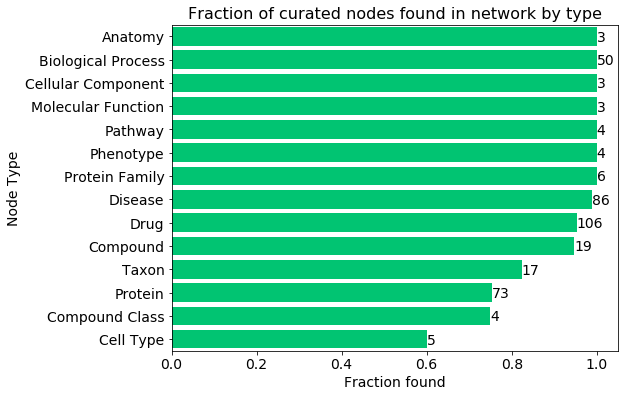

In [20]:
plt.figure(figsize=(8, 6))
data = data.sort_values('label', ascending=False).set_index('label')
count_plot_h(data['frac'], data['total'], annot_params={'size': 14}, color=sns.color_palette()[0], saturation=1)
plt.title('Fraction of curated nodes found in network by type', size=16)
plt.ylabel('Node Type', size=14)
plt.xlabel('Fraction found', size=14)
plt.xticks(size=14)
plt.yticks(size=14);

In [21]:
data

,in_nw,total,frac
label,,,
Taxon,14.0,17,0.823529
Protein Family,6.0,6,1.000000
Protein,55.0,73,0.753425
Phenotype,4.0,4,1.000000
Pathway,4.0,4,1.000000
Molecular Function,3.0,3,1.000000
Drug,101.0,106,0.952830
Disease,85.0,86,0.988372
Compound Class,3.0,4,0.750000


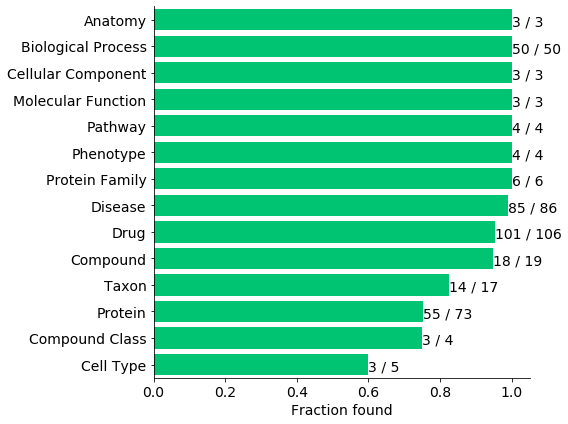

In [22]:
fig = plt.figure(figsize=(8, 6))
fig.set_tight_layout(True)

annot = (data['in_nw'].astype(int).astype(str) + ' / ' + data['total'].astype(str))

count_plot_h(data['frac'], annot, annot_params={'size': 14}, color=sns.color_palette()[0], saturation=1)
#plt.title('Fraction of curated nodes found in network by type', size=16)
plt.ylabel('')
plt.xlabel('Fraction found', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
sns.despine()
plt.savefig('f3a.tif', dpi=350);

In [23]:
edge_table['in_network'] = edge_table['fwd_edge_in_nw'] | edge_table['rev_edge_in_nw']
edge_table['in_network'].sum()

188

In [24]:
len(edge_table['in_network'])

418

In [25]:
edge_table['in_network'].sum() / len(edge_table['in_network'])

0.44976076555023925

In [26]:
de_dup_et = (edge_table.sort_values(['start_id', 'end_id', 'in_network'], ascending=[True, True, False])
                    .drop_duplicates(subset=['start_id', 'end_id']))
de_dup_et['in_network'].sum(), len(de_dup_et), de_dup_et['in_network'].sum() / len(de_dup_et)

(166, 369, 0.44986449864498645)

In [27]:
data = de_dup_et.groupby(['start_label', 'end_label'])['in_network'].sum().to_frame()
data['total'] = de_dup_et.groupby(['start_label', 'end_label']).apply(len)

In [28]:
data = data.reset_index()
data['frac'] = data['in_network'] / data['total']

In [29]:
frac_piv = data.pivot(index='end_label', columns='start_label', values='frac')
total_piv = data.pivot(index='end_label', columns='start_label', values='total')
in_nw_piv = data.pivot(index='end_label', columns='start_label', values='in_network')

In [30]:
import networkx as nx

In [31]:
G = nx.DiGraph()

for s in frac_piv.columns:
    G.add_node(s)

for start in frac_piv.columns:
    for end in frac_piv.index:
        this_frac = frac_piv.loc[end, start]
        this_tot = total_piv.loc[end, start]
        if not pd.isnull(this_frac):
            G.add_edge(u_of_edge=start, v_of_edge=end, total=this_tot, frac=this_frac)

In [32]:
#from networkx.drawing.nx_agraph import graphviz_layout as layout
layout = nx.circular_layout

In [33]:
import numpy as np

In [34]:
import matplotlib as mpl

In [35]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [36]:
from data_tools import plotting as pt

In [37]:
dmdb_to_mrn_nt = {'Anatomy' : 'AnatomicalEntity',
'Biological Process' : 'BiologicalProcessOrActivity',
'Cell Type' : 'AnatomicalEntity',
'Cellular Component' : 'AnatomicalEntity',
'Compound' : 'ChemicalSubstance',
'Compound Class' : 'ChemicalSubstance',
'Disease' : 'Disease',
'Drug' : 'ChemicalSubstance',
'Molecular Function' : 'BiologicalProcessOrActivity',
'Pathway' : 'Pathway',
'Phenotype' : 'PhenotypicFeature',
'Protein' : 'MacromolecularMachine',
'Protein Family' : 'MacromolecularMachine',
'Taxon' : 'OrganismTaxon'}

dmdb_colors = {k: node_color_map[v] for k, v in dmdb_to_mrn_nt.items()}

In [38]:
nx.__version__

'2.5'

In [39]:
from matplotlib.patches import ArrowStyle

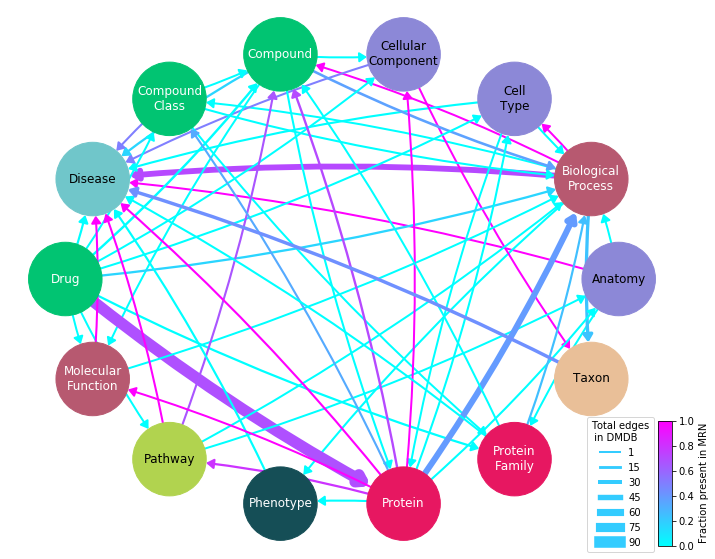

In [40]:
pos = layout(G)

def wt_to_thick(wt, max_wt):
    return (1.25 + (wt / max_wt))**3

# Edge size and color prep
nx_edges = G.edges()
edge_colors = [G[u][v]['frac'] for u,v in nx_edges]
weights = [G[u][v]['total'] for u,v in nx_edges]
max_weight = max(weights)
draw_weight_map = {w: wt_to_thick(w, max_weight) for w in weights}
draw_weights = [draw_weight_map[w] for w in weights]
# Node labeling and color prep
node_colors = [dmdb_colors[n] for n in G.nodes]
label_colors = [pt.determine_text_color(c, 0.52) for c in node_colors]
wt_labels = {}
bk_labels = {}
for n, c in zip(G.nodes, label_colors):
    if c == 'w':
        wt_labels[n] = pt.prep_node_labels(n, 5)
    else:
        bk_labels[n] = pt.prep_node_labels(n, 5)
    

node_options = {
    "node_color": node_colors,
    "node_size": 300*18,
}

edge_options = {
    "edge_color": edge_colors,
    "node_size": 300*18,
    "width": draw_weights,
    "edge_cmap": plt.cm.cool,
    "connectionstyle": 'arc3, rad=.05',
    "arrowstyle": ArrowStyle("-|>, head_length=.6, head_width=.4")
}

fig, ax = plt.subplots()
fig.set_size_inches(12, 10)

# Base Network
nx.draw_networkx_nodes(G, pos, **node_options)
nx.draw_networkx_edges(G, pos, **edge_options)
nx.draw_networkx_labels(G, pos, wt_labels, font_color='w')
nx.draw_networkx_labels(G, pos, bk_labels, font_color='k')

limits = plt.axis('off')

# Linewidth for legend
round_max = np.round(max_weight / 10) * 10
plt_thick = np.arange(0, round_max+1, (round_max / 6))
plt_thick[0] += 1

for label in plt_thick:
    wt = wt_to_thick(label, max_weight)
    ax.plot([0], [0], '-', linewidth=wt, color=edge_options['edge_cmap'](0.2), label=str(int(label)))
    
plt.legend(loc=1, title='Total edges\n in DMDB', bbox_to_anchor=[.973, .255])


# Colorbar for legend
cbaxes = inset_axes(plt.gca(), width="2%", height="23%", loc=4)
cbar = mpl.colorbar.ColorbarBase(cbaxes, cmap=edge_options['edge_cmap'])
cbar.set_label('Fraction present in MRN')



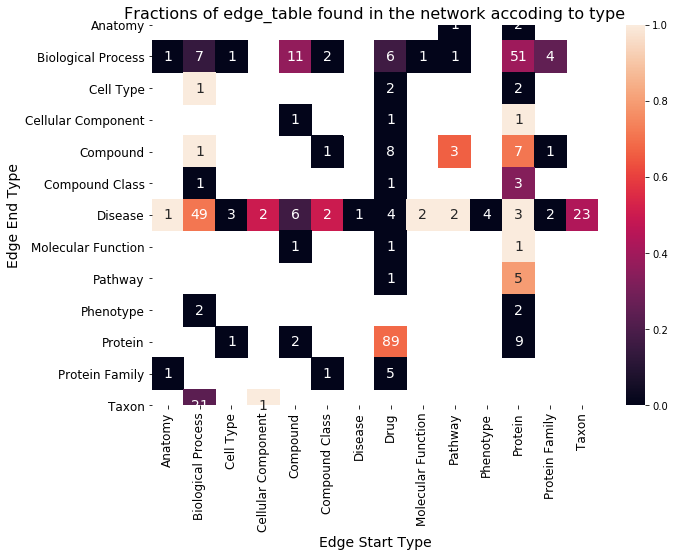

In [41]:
plt.figure(figsize=(10, 7))
hm = sns.heatmap(frac_piv, annot=total_piv, annot_kws={'size': 14})
hm.set_ylabel('Edge End Type', size=14)
hm.set_xlabel('Edge Start Type', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
hm.set_title('Fractions of edge_table found in the network accoding to type', size=16);

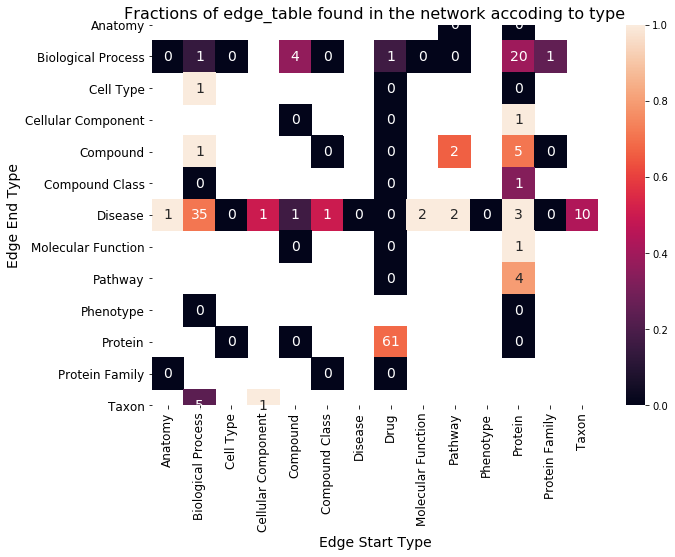

In [42]:
plt.figure(figsize=(10, 7))
hm = sns.heatmap(frac_piv, annot=in_nw_piv, annot_kws={'size': 14})
hm.set_ylabel('Edge End Type', size=14)
hm.set_xlabel('Edge Start Type', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
hm.set_title('Fractions of edge_table found in the network accoding to type', size=16);

In [43]:
de_dup_et['in_network'].sum() / len(de_dup_et)

0.44986449864498645

In [44]:
de_dup_et['in_network'].sum()

166

In [45]:
len(de_dup_et)

369

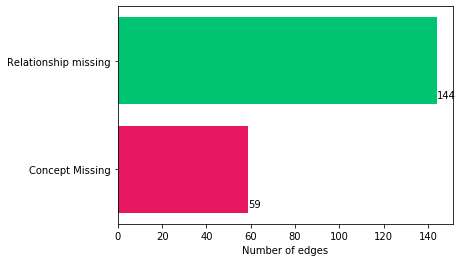

In [46]:
count_plot_h(de_dup_et.query('not in_network')['nodes_missing'].map({0:'Relationship missing', 1: 'Concept Missing', 2: 'Concept Missing'}), saturation=1);
plt.xlabel('Number of edges');
#plt.title('Number of nodes missing for a given missing Edge');

Text(0.5, 0, '')

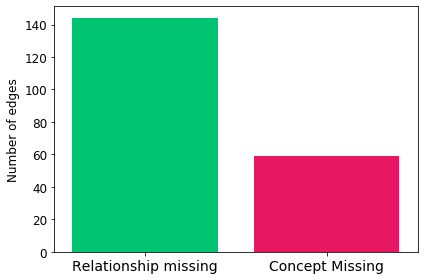

In [47]:
fig = plt.figure()
fig.set_tight_layout(True)
sns.countplot(de_dup_et.query('not in_network')['nodes_missing'].map({0:'Relationship missing', 1: 'Concept Missing', 2: 'Concept Missing'}), saturation=1)
plt.ylabel('Number of edges', size=12)
plt.yticks(size=12)
plt.xticks(size=14)
plt.xlabel('')
#plt.savefig('dmdb_edge_missing.pdf');
#plt.title('Number of nodes missing for a given missing Edge');

In [48]:
137+77

214

In [49]:
77/(137+77)

0.3598130841121495

In [50]:
new_piv = []
for r_num, (rowa, rowb) in enumerate(zip(in_nw_piv.itertuples(index=False), total_piv.itertuples(index=False))):
    new_r = []
    for c_num, (item1, item2) in enumerate(zip(rowa, rowb)):
        if not pd.isnull(item1):
            new_r.append('{} /\n{}'.format(int(item1), int(item2)))
        else:
            new_r.append(item1)
    new_piv.append(new_r)

In [51]:
str_piv = pd.DataFrame(new_piv, index=in_nw_piv.index, columns=in_nw_piv.columns)

In [52]:
'{:}'.format('12 / 23')

'12 / 23'

In [53]:
id_to_name = node_table.set_index('nid')['name'].to_dict()

In [54]:
combo.query(' end_id == "GO:0009252" and start_label != "Drug"')['start_label'].value_counts()

Gene              100
Protein            23
Protein Family      9
Compound            3
Name: start_label, dtype: int64

In [55]:
qr = de_dup_et.query('start_label == "Protein" and end_label == "Biological Process" and not in_network').copy()
qr['s_name'] = qr['start_id'].map(id_to_name)
qr['e_name'] = qr['end_id'].map(id_to_name)
qr.sample(10)

,start_id,end_id,start_nw_id,end_nw_id,fwd_edge_in_nw,rev_edge_in_nw,start_label,end_label,start_nw_label,end_nw_label,start_in_nw,end_in_nw,in_network,paring_missing,nodes_missing,s_name,e_name
33,UniProt:P43702,GO:0006260,NaN,GO:0006260,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,"topoisomerases II, IV",Bactierial DNA Replication|Bacterial DNA repli...
89,UniProt:Q12791,GO:0042311,NCBIGene:3778,GO:0042311,False,False,Protein,Biological Process,Gene,Biological Process,True,True,False,True,0,Calcium-activated potassium channel subunit al...,Vasodilation
344,UniProt:P0A298,GO:0006412,NaN,GO:0006412,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,50S ribosomal subunit,Bacterial Protein Synthesis|Bacterial Translation
72,UniProt:P0C1U9,GO:0006260,NaN,GO:0006260,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,Topoisomeraze 4,Bactierial DNA Replication|Bacterial DNA repli...
195,UniProt:P48048,GO:0042311,NCBIGene:3758,GO:0042311,False,False,Protein,Biological Process,Gene,Biological Process,True,True,False,True,0,ATP-sensitive inward rectifier potassium chann...,Vasodilation
76,UniProt:P20831,GO:0006260,NaN,GO:0006260,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,DNA gyrase,Bactierial DNA Replication|Bacterial DNA repli...
153,UniProt:Q81VT3,GO:0006412,NaN,GO:0006412,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,elongation factor g,Bacterial Protein Synthesis|Bacterial Translation
149,UniProt:O05131,GO:0009252,NaN,GO:0009252,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,Penicillin-binding protein 2B,Bacterial Cell Wall Synthesis|Peptidoglycan Bi...
226,UniProt:P0A0H0,GO:0006412,NaN,GO:0006412,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,30S Ribosomal Subunit,Bacterial Protein Synthesis|Bacterial Translation
279,UniProt:P47712,GO:0019370,NCBIGene:5321,GO:0019370,False,False,Protein,Biological Process,Gene,Biological Process,True,True,False,True,0,phospholipase a2|Phospholipase A2|Phospholipas...,leukotriene biosysntesis|leukotriene biosynthesis


In [56]:
frac_piv

start_label,Anatomy,Biological Process,Cell Type,Cellular Component,Compound,Compound Class,Disease,Drug,Molecular Function,Pathway,Phenotype,Protein,Protein Family,Taxon
end_label,,,,,,,,,,,,,,
Anatomy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN
Biological Process,0.0,0.142857,0.0,NaN,0.363636,0.0,NaN,0.166667,0.0,0.000000,NaN,0.392157,0.25,NaN
Cell Type,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN
Cellular Component,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN
Compound,NaN,1.000000,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,0.666667,NaN,0.714286,0.00,NaN
Compound Class,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.333333,NaN,NaN
Disease,1.0,0.714286,0.0,0.5,0.166667,0.5,0.0,0.000000,1.0,1.000000,0.0,1.000000,0.00,0.434783
Molecular Function,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN
Pathway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.800000,NaN,NaN


In [57]:
len(frac_piv)

13

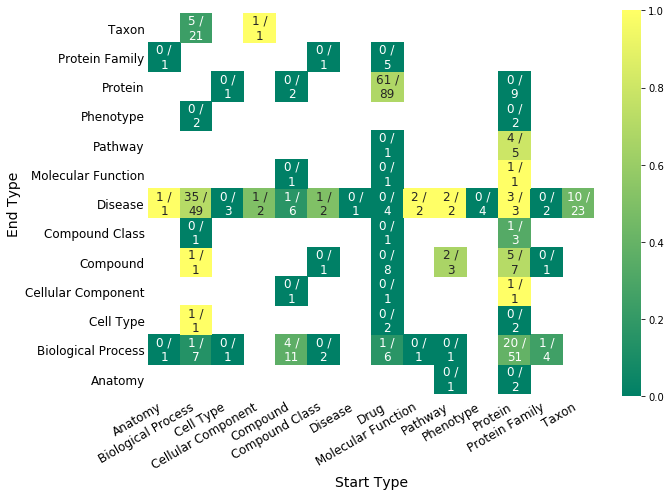

In [58]:
fig = plt.figure(figsize=(10, 7))
fig.set_tight_layout(True)
hm = sns.heatmap(frac_piv, annot=str_piv, annot_kws={'size': 12}, fmt='', cmap='summer')
hm.set_ylabel('End Type', size=14)
hm.set_xlabel('Start Type', size=14)
plt.xticks(size=12, rotation=30, ha='right')
plt.yticks(ticks=None, size=12)
plt.ylim([0 - .1, len(frac_piv) + .1]);
hm.tick_params(axis='both', which='both', length=0);
#sns.despine();
#plt.savefig('mrn_dmdb_edge.pdf');
#hm.set_title('Fractions of DMDB edges found in the network accoding to type', size=16);

In [59]:
edge_data = data.copy()

In [60]:
start_to_value = {l: i+1 for i, l in enumerate(sorted(edge_data['start_label'].unique()))}
end_to_value = {l: i+1 for i, l in enumerate(sorted(edge_data['end_label'].unique()))}

value_to_start = {v: k for k, v in start_to_value.items()}
value_to_end = {v: k for k, v in end_to_value.items()}

In [61]:
edge_data['x'] = edge_data['start_label'].map(start_to_value)
edge_data['y'] = edge_data['end_label'].map(end_to_value)

In [62]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [63]:
sns.set_style('whitegrid')

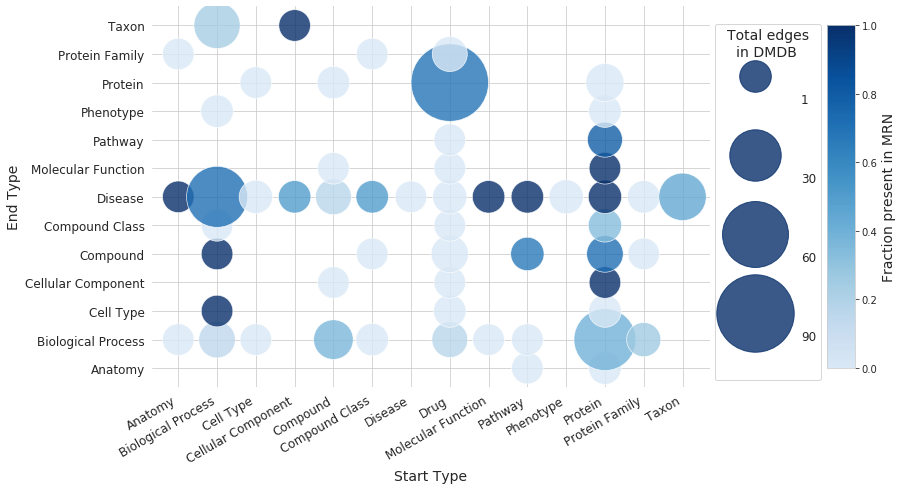

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 7))

#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
cmap = plt.cm.Blues
sizes = (1000, 6000)
hue_norm = (.15, 1)
alpha = .8


def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = truncate_colormap(cmap, *hue_norm, n=-1)


sns.scatterplot(data=edge_data, x='x', y='y', hue='frac', #hue_norm=hue_norm, 
                size='total', sizes=sizes, palette=cmap, alpha=alpha)

xlocs = np.arange(1, len(start_to_value)+1, 1)
xlabels = [value_to_start[l] for l in xlocs]
ylocs = np.arange(1, len(end_to_value)+1, 1)
ylabels = [value_to_end[l] for l in ylocs]

plt.xticks(xlocs, xlabels, rotation=30, size=12, ha='right')
plt.yticks(ylocs, ylabels, size=12)

plt.xlabel('Start Type', size=14)
plt.ylabel('End Type', size=14)

# Fix default Seaborn Legend
legend_handles, legend_labels = ax.get_legend_handles_labels()
for h in legend_handles:
     h.set_color(cmap(1.0, alpha))
legend_labels[-4] = 1
leg = ax.legend(handles=legend_handles[-4:], labels=legend_labels[-4:], loc=1, handlelength=6, handleheight=9, 
           fontsize=12, title='Total edges\n  in DMDB', bbox_to_anchor=[1.21, .97])
leg.get_title().set_size(14)

# Get rid boarder and tickmarks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.tick_params(axis='both', size=0)

# Colorbar for legend
cbaxes = inset_axes(plt.gca(), width="5%", height="90%", loc=5, borderpad=-14.5)
#norm = mpl.colors.Normalize(*hue_norm, clip=True)
cbar = mpl.colorbar.ColorbarBase(cbaxes, cmap=cmap)
cbar.set_label('Fraction present in MRN', size=14);


## See if we can have it match the color family of the rest of the figures

Need to create our own color map... Seaborn can help with that

In [65]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()


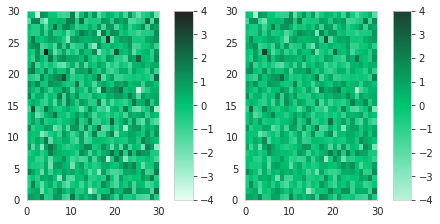

In [69]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

bottom = sns.dark_palette(colors[0], as_cmap=True, reverse=True)
top = sns.light_palette(colors[0], as_cmap=True, reverse=False)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='TestCmap')
plot_examples([newcmp, cmap])

/opt/mmayers/software/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/mmayers/software/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/mmayers/software/anaconda3/envs/ml/lib/python3.6/site-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


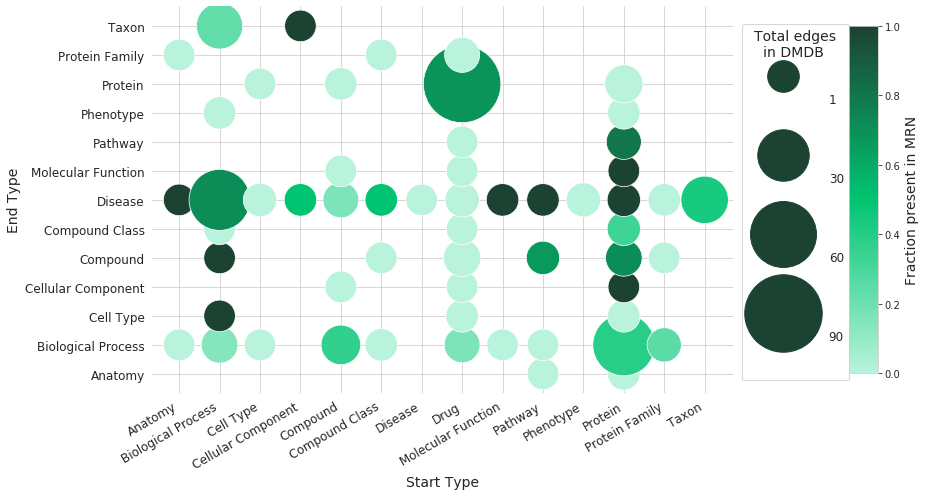

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 7))
fig.set_tight_layout(True)

#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
cmap = newcmp
sizes = (1000, 6000)
hue_norm = (.1, .9)
alpha = 1


def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = truncate_colormap(cmap, *hue_norm, n=-1)


sns.scatterplot(data=edge_data, x='x', y='y', hue='frac', #hue_norm=hue_norm, 
                size='total', sizes=sizes, palette=cmap, alpha=alpha)

xlocs = np.arange(1, len(start_to_value)+1, 1)
xlabels = [value_to_start[l] for l in xlocs]
ylocs = np.arange(1, len(end_to_value)+1, 1)
ylabels = [value_to_end[l] for l in ylocs]

plt.xticks(xlocs, xlabels, rotation=30, size=12, ha='right')
plt.yticks(ylocs, ylabels, size=12)

plt.xlabel('Start Type', size=14)
plt.ylabel('End Type', size=14)

# Fix default Seaborn Legend
legend_handles, legend_labels = ax.get_legend_handles_labels()
for h in legend_handles:
     h.set_color(cmap(1.0, alpha))
legend_labels[-4] = 1
leg = ax.legend(handles=legend_handles[-4:], labels=legend_labels[-4:], loc=1, handlelength=6, handleheight=9, 
           fontsize=12, title='Total edges\n  in DMDB', bbox_to_anchor=[1.21, .97])
leg.get_title().set_size(14)

# Get rid boarder and tickmarks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.tick_params(axis='both', size=0)

# Colorbar for legend
cbaxes = inset_axes(plt.gca(), width="5%", height="90%", loc=5, borderpad=-14.5)
#norm = mpl.colors.Normalize(*hue_norm, clip=True)
cbar = mpl.colorbar.ColorbarBase(cbaxes, cmap=cmap)
cbar.set_label('Fraction present in MRN', size=14)

plt.savefig('f3b.tif', dpi=350, bbox_inches='tight')